# Метод KNN


#### Сонарные данные

Сонар (ультразвуковой локатор) - это техника использования звука для навигации, коммуникации с объектами и определения объектов на воде или под водой, например морских судов.
Данный набор данных содержит ответные метрики для 60 различных частот сонара, отправленных на известные объекты - мины и камни. Для каждого отправленного и полученного сигнала были записаны данные об объекте, на который направлялся сонар (мина или камень). 

Цель - создать модель машинного обучения, которая может определить тип объекта - мина или камень - на основе ответа от сонаров на 60 различных частотах.

### Данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sonar.csv')

In [3]:
df.isna().count()

Freq_1     208
Freq_2     208
Freq_3     208
Freq_4     208
Freq_5     208
          ... 
Freq_57    208
Freq_58    208
Freq_59    208
Freq_60    208
Label      208
Length: 61, dtype: int64

In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Исследование данных

In [5]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [6]:
df.corr(numeric_only=True)['Target'].sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

### Разбиение на обучающий и тестовый наборы данных

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['Target', 'Label'], axis = 1)
y = df['Label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Модель

Oбъект PipeLine

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [11]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [12]:
operations = [('scaler', scaler), ('knn', knn)]

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
pipe = Pipeline(operations)

Поиск по сетке

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
k_values = list(range(1,30))

In [17]:
param_grid = {'knn__n_neighbors' : k_values}

In [18]:
classifier_grid = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy') 

In [19]:
classifier_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [20]:
classifier_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Нарисуем график средних тестовых оценок (mean_test_score) для каждого значения K, используя словарь .cv_results_

In [21]:
scores = pd.DataFrame(classifier_grid.cv_results_)

In [22]:
scores.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005600,0.001356,0.285660,0.554819,1,{'knn__n_neighbors': 1},0.894737,0.842105,0.864865,0.864865,0.945946,0.882504,0.035858,1
1,0.006200,0.002228,0.006800,0.000749,2,{'knn__n_neighbors': 2},0.842105,0.736842,0.891892,0.756757,0.918919,0.829303,0.072006,3
2,0.004603,0.000799,0.007598,0.000798,3,{'knn__n_neighbors': 3},0.868421,0.789474,0.837838,0.810811,0.945946,0.850498,0.054573,2
3,0.006397,0.001353,0.008406,0.000803,4,{'knn__n_neighbors': 4},0.763158,0.736842,0.756757,0.702703,0.864865,0.764865,0.054255,6


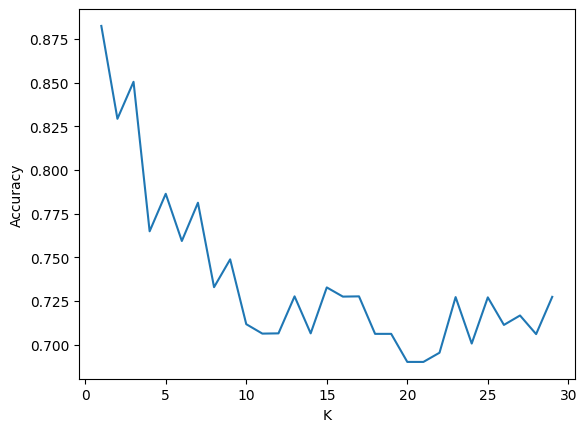

In [23]:
scores = scores['mean_test_score']
plt.plot(k_values,scores)
plt.xlabel("K")
plt.ylabel("Accuracy");

### Финальная оценка модели

Отчёт "classification report" и матрица "confusion matrix".

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
y_pred = classifier_grid.predict(X_test)

In [58]:
confusion_matrix(y_test, y_pred)

array([[9, 2],
       [1, 9]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.90      0.82      0.86        11
           R       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21

